# Homework 10

## ASTR 5900, Fall 2017, University of Oklahoma

### Regression

# Problem 1

Here we will be performing linear regression using Gaussian basis functions, then applying regularization.

### Part A

Load the data from the appropriately named `regresssion/hw10-1.dat`.  The data points have homoscedastic errors ($\sigma = 1.8$). Fit 50 Gaussians to the data using an `sklearn.linear_model.LinearRegression` object.  Evenly space the centers between 0 and 20.  Give each of the Gaussians a width of 0.6.

Note these objects from `linear_model` perform line fits, fitting x to y.  To use a Gaussian basis as described above, we must fit Gauss(x) to y.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model
data = np.loadtxt('hw10-1.dat',skiprows=1,delimiter=',')
lr=sklearn.linear_model.LinearRegression()
r=sklearn.linear_model.Ridge(fit_intercept=True,alpha=0.1)

(100,)
(100,)


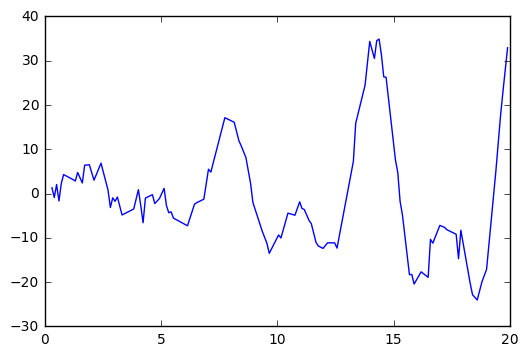

In [3]:
x=data[:,0]
y=data[:,1]
print x.shape
print y.shape
plt.plot(x,y)
plt.show()


In [4]:
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)


(100, 50)
(100,)


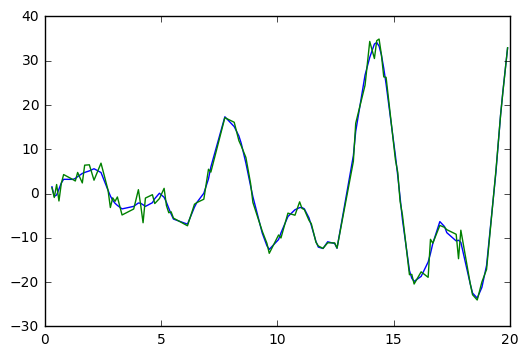

In [5]:
sigma=0.6
mu=np.linspace(0.,20.,50)


X=gaussian_basis(x[:,None],mu,sigma)
print X.shape


print y.shape
lr.fit(X,y)
plt.plot(x,lr.predict(X))
plt.plot(x,y)
plt.show()
    
  
    
    
    
    
    

### Part B

Now perform ridge regression using `sklearn.linear_model.Ridge` with the same Gaussian model.  

Plot the Gaussian coefficients as a function of the regularization parameter.

Then plot the variance (given by the regular error function) and bias (given by the sum of squares of the coefficients) as a function of the regularization parameter.  Use appropriate labels.

(50,)


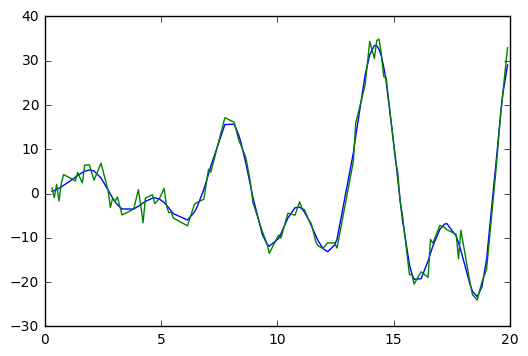

In [6]:
r.fit(X,y)
w1=r.coef_
print w1.shape



plt.plot(x,r.predict(X))
plt.plot(x,y)
plt.show()

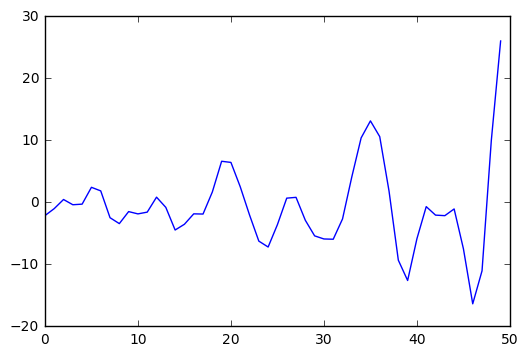

In [7]:
plt.plot(w1)
plt.show()

### Part C

Determine an optimal regularization parameter by minimizing the cross-validation error.

You may split the data into 5 subsets.  One set will be used to test your models.  Use the other 4 to train your models one at a time.  Consider using an error function like Ivesic 8.39.

# Problem 2

You are to use `linmix`, an MC code that fits a line to data with errors in the y AND x directions.

### Part A

Faced with data that have uncertainties on both X and Y, and some upper limits, you may be tempted to fit only the detections (ignoring the upper limits) and only the yerror, since that can be done easily with polyfit.  Do that, and record the slope and intercept that you obtain.

Import the data from `regression/linmix.dat`.  Notice this file contains x and y values with their respective errors, along with numbers indicating detected points (1) vs nondetected (0).

Fit a line to the detected data with `numpy.polyfit` using the y-errors.  Print the slope and intercept, and plot the line fit over the detected points.

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(226,)
(226,)
(226,)
(226,)


<Container object of 3 artists>

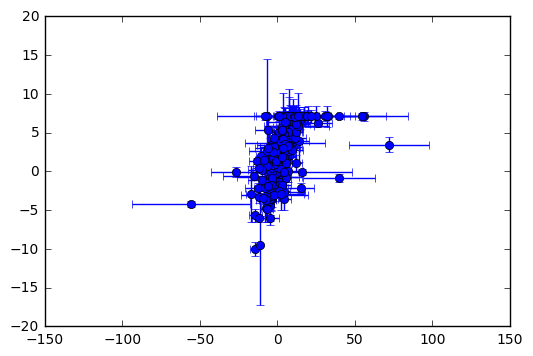

In [9]:
import linmix
import matplotlib.axes as axes
Axes=axes.Axes
data=np.loadtxt('linmix.dat',skiprows=1,delimiter=',')
x=data[:,0]
y=data[:,1]
xerr=data[:,2]
yerr=data[:,3]
print x.shape
print y.shape
print xerr.shape
plt.scatter(x,y)
print yerr.shape
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o')

<Container object of 3 artists>

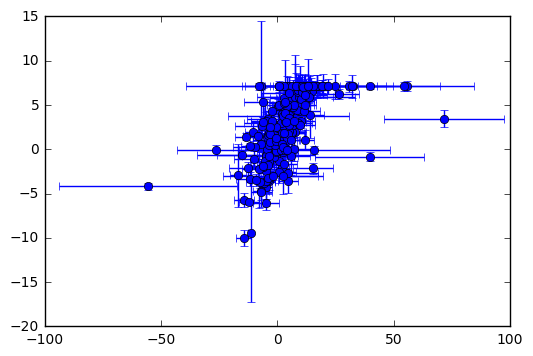

In [10]:
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o')

[ 0.17055861  2.40784419]


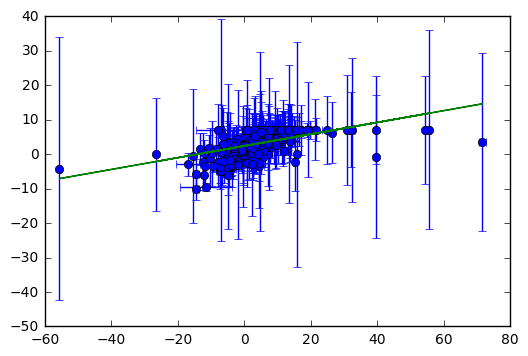

In [20]:
ae = np.empty(len(x))
ae.fill(0.15)
be = ae


result=np.polyfit(x,y,1,w=1/yerr)
print result
y0=np.poly1d(result)
yout=y0(x)
plt.errorbar(x,y,xerr,yerr,fmt='o')
plt.plot(x,yout)


In [22]:
print 'slope =', result[0]
print 'y-intercept =',result[1]

print result.shape

slope = 0.170558612453
y-intercept = 2.40784418965
(2,)


### Part B

Using linmix, you can fit data with uncertainties on both X and Y.  You may be tempted to do that, and still ignore the upper limits. Do that, and record the median slope and intercept that  you obtain.  Also plot a histogram of the slope and intercept values, as well as plotting the best fitting line on a scatter plot of the data.

In [31]:
lm = linmix.LinMix(x,y,xerr,yerr,K=2)
lm.run_mcmc(silent=True)

In [35]:
print lm.chain.shape
print lm.chain[0]

(10000,)
(0.9306089071667097, 0.5737094094358229, 0.027958264187821293, [0.6501099927707131, 0.3498900072292869], [0.30207831720680467, 10.254566185423219], [25.685893176009824, 0.24523975358917047], 4.737512823594786, 16.95954069117529, 0.5680153719860201, 3.784354369366436, 6.270209440327818, 0.9989214776952176)


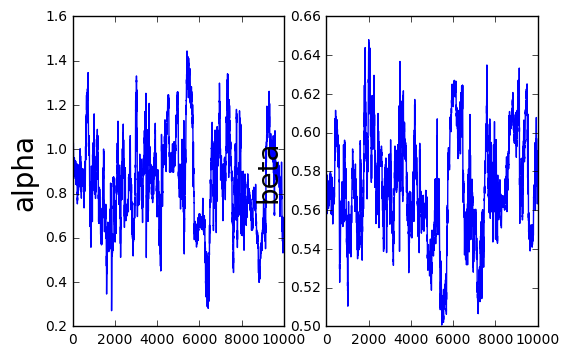

In [36]:
alpha=lm.chain[['alpha']]
beta=lm.chain[['beta']]

plt.subplot(1,2,1)
plt.ylabel('alpha',fontsize=20)
plt.plot(lm.chain[['alpha']])
plt.subplot(1,2,2)
plt.ylabel('beta',fontsize=20)
plt.plot(lm.chain[['beta']])


0.84999985216 0.194431659751
0.57165758365 0.0262045726418


(array([  0.5703389 ,   2.71589951,   2.30851459,   1.95544765,
          4.29112123,   8.03906256,  10.46979262,  13.17211264,
         17.97925477,  16.29539708,  11.56973192,  11.44751645,
          8.44644748,   8.10696005,   8.10696005,   5.71696847,
          3.40845389,   0.70613387,   0.28516945,   0.20369246]),
 array([ 0.50072357,  0.50808761,  0.51545166,  0.5228157 ,  0.53017974,
         0.53754378,  0.54490783,  0.55227187,  0.55963591,  0.56699996,
         0.574364  ,  0.58172804,  0.58909208,  0.59645613,  0.60382017,
         0.61118421,  0.61854825,  0.6259123 ,  0.63327634,  0.64064038,
         0.64800443]),
 <a list of 1 Patch objects>)

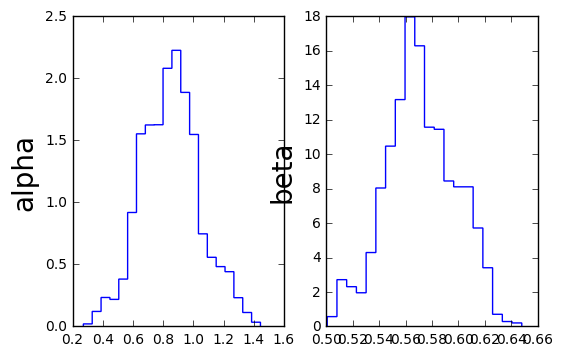

In [37]:
print lm.chain['alpha'].mean(),lm.chain['alpha'].std()
print lm.chain['beta'].mean(),lm.chain['beta'].std()


plt.subplot(1,2,1)
plt.ylabel('alpha',fontsize=20)
plt.hist(lm.chain['alpha'],bins=20,histtype='step',normed=True)
plt.subplot(1,2,2)
plt.ylabel('beta',fontsize=20)
plt.hist(lm.chain['beta'],bins=20,histtype='step',normed=True)

In [38]:
print 'median intercept is ', np.median(lm.chain['alpha'])
print 'median slope is ', np.median(lm.chain['beta'])


median intercept is  0.849814331325
median slope is  0.569734033127


In [39]:
xplot=-5.0+0.01*np.arange(1001)
print xplot.shape

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions=np.zeros([7,1001])


numsamples=len(lm.chain)
temp2=np.zeros(numsamples)
f2=np.array(range(numsamples))/float(numsamples)

for i in range(1001):
    for j in range(10000):
        temp2[j]=lm.chain[j]['alpha']+xplot[i]*lm.chain[j]['beta']
    x2=np.sort(temp2)
    confidence_regions[0:7,i]=np.interp(percent_regions,f2,x2)



(1001,)


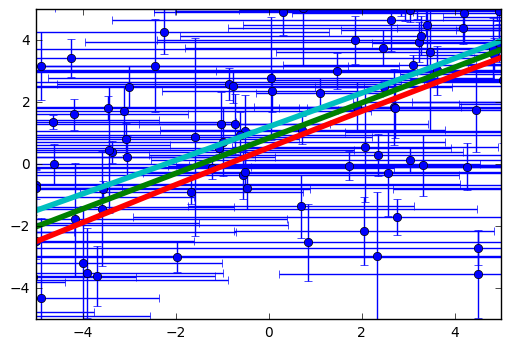

In [41]:
plt.axis([-5,5,-5,5],fontsize=20,linewidth=4)


#plt.errorbar(xi, eta, fmt='o')

plt.errorbar(x, y, yerr=yerr, xerr=xerr,fmt='o')
plt.plot(xplot,confidence_regions[3,:],linewidth=4)
plt.plot(xplot,confidence_regions[1,:],linewidth=4)
plt.plot(xplot,confidence_regions[5,:],linewidth=4)

### Part C

Now include the upper limits, and use linmix to obtain the slope and intercepts again.  Make appropriate plots.  How does the best fitting slope compare with the one that you obtained in Part B?

In [43]:
delta = y > 1.0
notdelta = np.logical_not(delta)
ycens = y.copy()
ycens[notdelta] = 1.0
lmcens  = linmix.LinMix(x, ycens, xerr, yerr, delta=delta, K=2)
lmcens.run_mcmc(silent=True)

In [47]:
print lm.chain.shape
print lm.chain[0]

(10000,)
(0.9306089071667097, 0.5737094094358229, 0.027958264187821293, [0.6501099927707131, 0.3498900072292869], [0.30207831720680467, 10.254566185423219], [25.685893176009824, 0.24523975358917047], 4.737512823594786, 16.95954069117529, 0.5680153719860201, 3.784354369366436, 6.270209440327818, 0.9989214776952176)


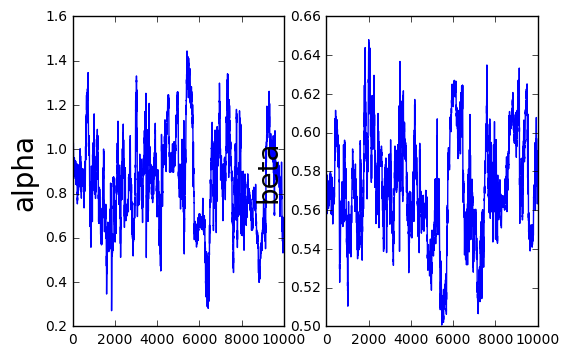

In [44]:
alpha=lm.chain[['alpha']]
beta=lm.chain[['beta']]

plt.subplot(1,2,1)
plt.ylabel('alpha',fontsize=20)
plt.plot(lm.chain[['alpha']])
plt.subplot(1,2,2)
plt.ylabel('beta',fontsize=20)
plt.plot(lm.chain[['beta']])


0.84999985216 0.194431659751
0.57165758365 0.0262045726418


(array([  0.5703389 ,   2.71589951,   2.30851459,   1.95544765,
          4.29112123,   8.03906256,  10.46979262,  13.17211264,
         17.97925477,  16.29539708,  11.56973192,  11.44751645,
          8.44644748,   8.10696005,   8.10696005,   5.71696847,
          3.40845389,   0.70613387,   0.28516945,   0.20369246]),
 array([ 0.50072357,  0.50808761,  0.51545166,  0.5228157 ,  0.53017974,
         0.53754378,  0.54490783,  0.55227187,  0.55963591,  0.56699996,
         0.574364  ,  0.58172804,  0.58909208,  0.59645613,  0.60382017,
         0.61118421,  0.61854825,  0.6259123 ,  0.63327634,  0.64064038,
         0.64800443]),
 <a list of 1 Patch objects>)

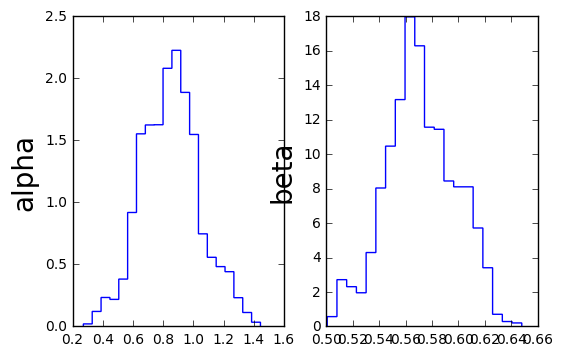

In [45]:
print lm.chain['alpha'].mean(),lm.chain['alpha'].std()
print lm.chain['beta'].mean(),lm.chain['beta'].std()


plt.subplot(1,2,1)
plt.ylabel('alpha',fontsize=20)
plt.hist(lm.chain['alpha'],bins=20,histtype='step',normed=True)
plt.subplot(1,2,2)
plt.ylabel('beta',fontsize=20)
plt.hist(lm.chain['beta'],bins=20,histtype='step',normed=True)

In [46]:
print 'median intercept is ', np.median(lm.chain['alpha'])
print 'median slope is ', np.median(lm.chain['beta'])


median intercept is  0.849814331325
median slope is  0.569734033127


In [48]:
xplot=-5.0+0.01*np.arange(1001)
print xplot.shape

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions=np.zeros([7,1001])


numsamples=len(lm.chain)
temp2=np.zeros(numsamples)
f2=np.array(range(numsamples))/float(numsamples)

for i in range(1001):
    for j in range(10000):
        temp2[j]=lm.chain[j]['alpha']+xplot[i]*lm.chain[j]['beta']
    x2=np.sort(temp2)
    confidence_regions[0:7,i]=np.interp(percent_regions,f2,x2)


(1001,)


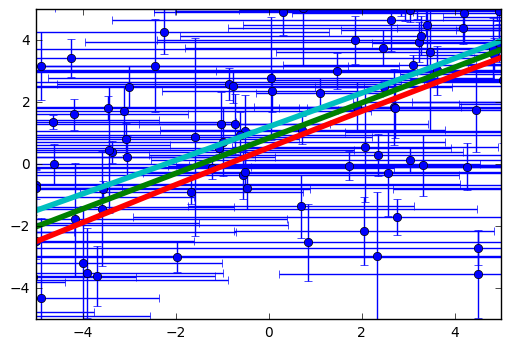

In [49]:
plt.axis([-5,5,-5,5],fontsize=20,linewidth=4)


#plt.errorbar(xi, eta, fmt='o')

plt.errorbar(x, y, yerr=yerr, xerr=xerr,fmt='o')
plt.plot(xplot,confidence_regions[3,:],linewidth=4)
plt.plot(xplot,confidence_regions[1,:],linewidth=4)
plt.plot(xplot,confidence_regions[5,:],linewidth=4)

# Problem Z

Comment on the amount of time it took you to complete this assignment.

This assignment took me about 5 hours